0.10798193302637613


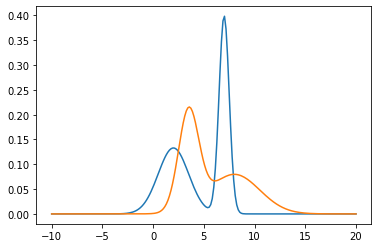

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gen_gaussian(x, mu, sig):
  return 1 / np.sqrt(2 * np.pi) / sig * np.exp(-((x - mu) / sig) ** 2 / 2)

np.random.seed(5)

#check we get the right answer
print(gen_gaussian(1, 0, 0.5))

x = np.linspace(-10, 20, 200)

pxw1 = gen_gaussian(x, 2, 1.5) + gen_gaussian(x, 7, 0.5)
pxw1 /= np.trapz(pxw1, x)

pxw2 = gen_gaussian(x, 8, 2.5) + gen_gaussian(x, 3.5, 1)
pxw2 /= np.trapz(pxw2, x)

fig, ax = plt.subplots()
plt.plot(x,pxw1)
plt.plot(x,pxw2)


(-3.0, 15.0)

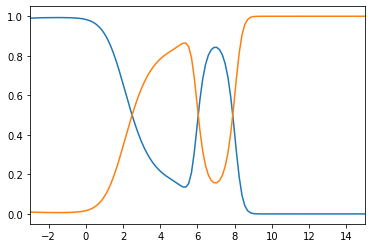

In [3]:
Pw1 = 0.5
Pw2 = 0.5
#Pw1 = 0.9
#Pw2 = 0.1

evidence = Pw1 * pxw1 + Pw2 * pxw2
pw1x = Pw1 * pxw1 / evidence
pw2x = Pw2 * pxw2 / evidence

fig, ax = plt.subplots()
plt.plot(x, pw1x)
plt.plot(x, pw2x)
plt.xlim(-3, 15)


(-3.0, 3.0)

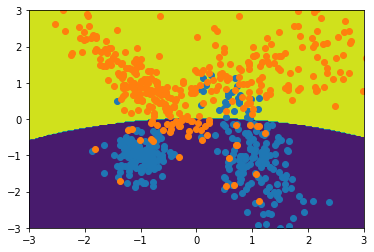

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = GaussianNB()
clf.fit(X_train, y_train)

#set a range value which will be used when setting limits from -r to r
r = 3
x1line = np.linspace(-r, r, 200)
x2line = np.linspace(-r, r, 200)
x1grid, x2grid = np.meshgrid(x1line, x2line)
Xgrid = np.array([x1grid, x2grid]).reshape([2,40000]).T

classVals = clf.predict(Xgrid)
classVals = np.reshape(classVals, [200, 200])

fig, ax = plt.subplots()
plt.contourf(x1line, x2line, classVals)

ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1])
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])
plt.xlim(-r, r)
plt.ylim(-r, r)

In [5]:
y_test_model = clf.predict(X_test)

nTot = len(y_test) 
nMatch = 0 
for i in range(len(y_test)):
	if y_test[i] == y_test_model[i]:
		nMatch += 1

print(100 * nMatch / nTot)



91.21212121212122


(-3.0, 3.0)

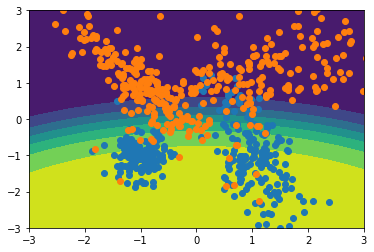

In [7]:
probVals = clf.predict_proba(Xgrid)
probGrid = np.reshape(probVals[:, 0], [200, 200])

fig, ax = plt.subplots()
plt.contourf(x1line,x2line,probGrid)

ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1])
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])
plt.xlim(-r, r)
plt.ylim(-r, r)